In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import ast

In [2]:
#pd.get_option("display.max_columns")
pd.set_option("display.max_columns",70)
#pd.get_option('display.max_rows')
pd.set_option('display.max_rows',200)

In [3]:
df0=pd.read_csv('./pcdata.csv')
df0.head(5)

,0,Unnamed: 1,チェックをいれてクリック,チェックをいれてクリック.1,製品名,価格,取扱店舗数,ランキング,満足度,クチコミ,CPU,CPUスコア,画面サイズ,画面種類,解像度,タッチパネル,2in1タイプ,ワイド画面,表面処理,OS,Office詳細,メモリ容量,メモリ規格,メモリスロット（空き）,ストレージ容量,HDD回転数,ドライブ有無,ドライブ規格,ビデオチップ,ビデオメモリ,重量,幅x高さx奥行,カラー,駆動時間,インターフェース,無線LAN,Wi-Fi Direct対応,NFC,LAN,SIMカード,インテル Evoプラットフォーム,ゲーミングPC,USB PD,ファンレス,BTO対応,その他,生体認証,センサー,地上デジタルチューナー,エコマーク,認定番号,発売日,登録日
0,1,0.0,NaN,NaN,LenovoIdeaPad Slim 350i Chromebook 82BA000LJP,"¥18,000",38店舗,27位,4.20(4票),5件,インテル Celeron N4020(Gemini Lake Refresh)1.1GHz/2コア,1589,11.6型(インチ),NaN,FWXGA (1366x768),NaN,NaN,○,ノングレア(非光沢),Chrome OS,Office無し,4GB,LPDDR4,0(0),eMMC：32GB,NaN,無し,NaN,Intel UHD Graphics 600,メインメモリと共有,1.12kg,286.7x18.1x205.5mm,オニキスブラック,10時間,USB3.1 Gen1(USB3.0) Type-Ax2/Type-Cx2microSDスロット,IEEE802.11a/b/g/n/ac,NaN,NaN,NaN,NaN,NaN,NaN,○,NaN,NaN,WebカメラBluetooth4.2日本語キーボード,NaN,NaN,NaN,NaN,NaN,2020年 8月下旬,2020年 6月3日
1,2,1.0,NaN,NaN,KanoKano PC,"¥19,800",12店舗,221位,0.00(0票),0件,インテル Celeron N4000(Gemini Lake)1.1GHz/2コア,1406,11.6型(インチ),NaN,FWXGA (1366x768),○,セパレート,○,NaN,Windows 10 Pro,Office無し,4GB,DDR4,NaN,eMMC：64GB,NaN,無し,NaN,NaN,NaN,1.765kg,287.5x35.6x194mm,ブラック系,NaN,HDMIx1USB3.1 Gen1(USB3.0)x2USB Type-Cx1microSD...,IEEE802.11a/b/g/n/ac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bluetooth5.0 BLE日本語キーボード,NaN,NaN,NaN,NaN,NaN,2020年 8月22日,2020年 8月13日
2,3,2.0,NaN,NaN,LenovoLenovo 300e Chromebook 2nd Gen 82CE0009JP,"¥19,800",2店舗,163位,0.00(0票),0件,AMD A4-9120C1.6GHz/2コア,810,11.6型(インチ),IPS液晶,FWXGA (1366x768),○,コンバーチブル,○,NaN,Chrome OS,Office無し,4GB,DDR4 PC4-14900,0(0),eMMC：32GB,NaN,無し,NaN,AMD Radeon R4 Graphics,NaN,1.32kg,290x20.35x204mm,ブラック,10時間,USB3.1 Gen1(USB3.0) Type-Ax2/Type-Cx2microSDスロット,IEEE802.11a/b/g/n/ac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WebカメラBluetooth4.2日本語キーボード,NaN,加速度センサージャイロセンサー,NaN,NaN,NaN,2020年 3月,2021年 7月15日
3,4,3.0,NaN,NaN,サイエルインターナショナルM-WORKS MW-WPC02,"¥21,979",11店舗,544位,0.00(0票),0件,インテル Celeron Dual-Core N3350(Apollo Lake)1.1GH...,1146,8.9型(インチ),NaN,NaN,○,セパレート,NaN,NaN,Windows,Office無し,4GB,NaN,NaN,64GB,NaN,無し,NaN,NaN,NaN,0.84kg,NaN,ブラック系,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Webカメラ日本語キーボード,NaN,NaN,NaN,NaN,NaN,2020年11月中旬,2021年 7月26日
4,5,4.0,NaN,NaN,ASUSChromebook CX1(CX1100) CX1100CNA-GJ0040,"¥23,800",3店舗,353位,3.43(2票),5件,インテル Celeron Dual-Core N3350(Apollo Lake)1.1GH...,1146,11.6型(インチ),TFTカラー液晶,FWXGA (1366x768),NaN,NaN,○,ノングレア(非光沢),Chrome OS,Office無し,4GB,LPDDR4 PC4-19200,NaN,eMMC：32GB,NaN,無し,NaN,Intel HD Graphics 500,NaN,1.2kg,287.4x17.5x200.1mm,トランスペアレントシルバー,NaN,USB3.2 Gen1 Type-Ax1/Type-Cx2microSDスロット,IEEE802.11a/b/g/n/ac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WebカメラBluetooth4.2日本語キーボード,NaN,NaN,NaN,NaN,NaN,2021年 6月上旬,2021年 5月20日


In [4]:
#スクレイピングによって紛れ込んだ不要な行を削除
df1=df0[df0['製品名']!='製品名']
df1=df1.dropna(subset=['製品名'])

In [5]:
#df1.isnull().sum()

In [6]:
df1.shape

(2841, 53)

In [7]:
df0.columns

Index(['0', 'Unnamed: 1', 'チェックをいれてクリック', 'チェックをいれてクリック.1', '製品名', '価格',
       '取扱店舗数', 'ランキング', '満足度', 'クチコミ', 'CPU', 'CPUスコア', '画面サイズ', '画面種類',
       '解像度', 'タッチパネル', '2in1タイプ', 'ワイド画面', '表面処理', 'OS', 'Office詳細', 'メモリ容量',
       'メモリ規格', 'メモリスロット（空き）', 'ストレージ容量', 'HDD回転数', 'ドライブ有無', 'ドライブ規格',
       'ビデオチップ', 'ビデオメモリ', '重量', '幅x高さx奥行', 'カラー', '駆動時間', 'インターフェース', '無線LAN',
       'Wi-Fi Direct対応', 'NFC', 'LAN', 'SIMカード', 'インテル Evoプラットフォーム', 'ゲーミングPC',
       'USB PD', 'ファンレス', 'BTO対応', 'その他', '生体認証', 'センサー', '地上デジタルチューナー',
       'エコマーク', '認定番号', '発売日', '登録日'],
      dtype='object')

In [8]:
primary=['製品名','OS','CPU','CPUスコア','メモリ容量','ストレージ容量','ビデオチップ','Office詳細','価格']

In [9]:
secondary=['製品名', '価格','CPU', 'CPUスコア', '画面サイズ','画面種類','解像度', 'タッチパネル', '2in1タイプ', 'OS', 'Office詳細', 'メモリ容量',
       'メモリ規格', 'ストレージ容量','ドライブ有無','ビデオチップ','ビデオメモリ','インターフェース','LAN', 'SIMカード','ゲーミングPC','USB PD', '生体認証', 'センサー' ]

In [10]:
#最も大きく影響しそうなカラムを抽出
df2=df1[primary]

In [11]:
df2=df2.rename(columns={'製品名':'Name','CPUスコア':'CPU_Score','メモリ容量':'Memory','ストレージ容量':'Storage','ビデオチップ':'GPU','Office詳細':'Office','価格':'Price'})

In [12]:
df2.head()

,Name,OS,CPU,CPU_Score,Memory,Storage,GPU,Office,Price
0,LenovoIdeaPad Slim 350i Chromebook 82BA000LJP,Chrome OS,インテル Celeron N4020(Gemini Lake Refresh)1.1GHz/2コア,1589,4GB,eMMC：32GB,Intel UHD Graphics 600,Office無し,"¥18,000"
1,KanoKano PC,Windows 10 Pro,インテル Celeron N4000(Gemini Lake)1.1GHz/2コア,1406,4GB,eMMC：64GB,NaN,Office無し,"¥19,800"
2,LenovoLenovo 300e Chromebook 2nd Gen 82CE0009JP,Chrome OS,AMD A4-9120C1.6GHz/2コア,810,4GB,eMMC：32GB,AMD Radeon R4 Graphics,Office無し,"¥19,800"
3,サイエルインターナショナルM-WORKS MW-WPC02,Windows,インテル Celeron Dual-Core N3350(Apollo Lake)1.1GH...,1146,4GB,64GB,NaN,Office無し,"¥21,979"
4,ASUSChromebook CX1(CX1100) CX1100CNA-GJ0040,Chrome OS,インテル Celeron Dual-Core N3350(Apollo Lake)1.1GH...,1146,4GB,eMMC：32GB,Intel HD Graphics 500,Office無し,"¥23,800"


In [13]:
df2.describe()

,Name,OS,CPU,CPU_Score,Memory,Storage,GPU,Office,Price
count,2841,2841,2841,2780,2841,2841,2821,2826,2841
unique,2841,18,138,121,6,47,113,6,1670
top,パナソニックLet's note QV9 CF-QV9EFNQR SIMフリー,Windows 10 Home 64bit,第11世代 インテル Core i7 1165G7(Tiger Lake)2.8GHz/4コア,10675,8GB,SSD：256GB,Intel Iris Xe Graphics,Office無し,"¥129,800"
freq,1,1741,546,546,1389,673,976,1709,22


In [14]:
plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [15]:
df2.isnull().sum()

Name          0
OS            0
CPU           0
CPU_Score    61
Memory        0
Storage       0
GPU          20
Office       15
Price         0
dtype: int64

In [16]:
df2['Office'].unique()

array(['Office無し', 'WPS Office Standard Edition', nan,
       'Microsoft Office Home and Business 2019',
       'Microsoft Office Personal 2019',
       'Microsoft Office Home and Business 2021',
       'Microsoft Office Personal 2021'], dtype=object)

In [17]:
#Officeの有無の二値化
df2=df2.replace(['Microsoft Office Home and Business 2019','Microsoft Office Home and Business 2021'],1)
df2=df2.replace('WPS Office Standard Edition',1)
df2=df2.replace(['Microsoft Office Personal 2019','Microsoft Office Personal 2021'],1)
df2=df2.replace('Office無し',0)
df2.loc[df2['Office'].isnull(),'Office']=0
df2['Office'].unique()

array([0., 1.])

In [18]:
df2.isnull().sum()

Name          0
OS            0
CPU           0
CPU_Score    61
Memory        0
Storage       0
GPU          20
Office        0
Price         0
dtype: int64

In [19]:
#OSをHomeとProに二分
df3=df2[df2['OS']!='Chrome OS']
df3=df3.replace(['Windows 10 Pro 64bit',
                 'Windows 10 pro 64bit',
                   'Windows 10 Pro 64bit 英語版',
                   'Windows 10 Pro 64bit(November 2019 Update)',
                   'Windows 10 Pro Education 64bit',
                   'Windows 10 Pro for Workstations 64bit',
                 'Windows 11 Pro 64bit',
                 'Windows 11 Pro','Windows 10 Pro'],'Windows Pro')
df3=df3.replace(['Windows 10 Home(Sモード) 64bit',
                 'Windows',
                 'Windows 10 Home 64bit',
                 'Windows 10 Home(Sモード)',
                 'Windows 10 Home 1909(Windows 10 November 2019 Update)',
                'Windows 10','Windows 11 Home 64bit','Windows 11 Home','Windows 10 Home'],'Windows Home')
#df3=df3.replace('Windows 11 Home 64bit','Windows 11 Home')
#df3=df3.replace('Windows 11 Pro 64bit','Windows 11 Pro')
df3['OS'].unique()

array(['Windows Pro', 'Windows Home'], dtype=object)

In [20]:
#GPUをスコアリングするためにベンチマークスコアを追加する。そのためにKeyとなるGPU名の書式を揃える
df4=df3.copy()
df4.loc[df4['GPU'].isnull(),'GPU']='Intel IGPU'
df4['GPU']=df4['GPU'].apply(lambda x: x.split("+")[0])
for index,row in df4.iterrows():
    if 'Intel' in row['GPU']:
        df4.at[index,'GPU']='Intel IGPU'
#df4['GPU']=df4['GPU'].replace('Max-Q Design','',regex=True)
#df4['GPU']=df4['GPU'].replace('Max-Q','',regex=True)
df4['GPU']=df4['GPU'].replace('Design','',regex=True)
df4['GPU']=df4['GPU'].replace(['AMD Radeon R2 Graphics', 'AMD Radeon R4 Graphics',
       'AMD Radeon R3 Graphics', 'AMD Radeon Graphics',
       'AMD Radeon RX Vega 10 Graphics','AMD Radeon Vega 8 Graphics','AMD Radeon Vega 6 Graphics','AMD Radeon Vega 3 Graphics','AMD Radeon Vega 9 Graphics Microsoft Surface Edition'
        ,'AMD Radeon RX Vega 11 Graphics Microsoft Surface Edition','AMD Radeon Vega 10 Graphics'],'AMD IGPU')
df4.loc[df4['GPU'].str.contains('AMD Radeon'),'GPU']=df4.loc[df4['GPU'].str.contains('AMD Radeon'),'GPU'].replace('AMD ','',regex=True)
df4.loc[df4['GPU'].str.contains('NVIDIA'),'GPU']=df4.loc[df4['GPU'].str.contains('NVIDIA'),'GPU'].replace('NVIDIA ','',regex=True)
df4.loc[df4['GPU'].str.contains('SUPER'),'GPU']=df4.loc[df4['GPU'].str.contains('SUPER'),'GPU'].replace('SUPER','Super',regex=True)
df4['GPU']=df4['GPU'].replace(' ','',regex=True)
df4['GPU']=df4['GPU'].str.rstrip()
#df4['GPU'].value_counts()

In [21]:
df4['GPU'].value_counts()

IntelIGPU                   1828
AMDIGPU                      421
GeForceRTX3060                85
GeForceRTX3070                75
GeForceRTX3050Ti              47
GeForceGTX1650                44
GeForceRTX3080                43
GeForceRTX3050                38
GeForceGTX1650Ti              24
GeForceGTX1660Ti              17
GeForceRTX2060                17
GeForceGTX1650Max-Q           15
GeForceMX450                  13
GeForceRTX2070Max-Q           11
GeForceRTX2080SuperMax-Q      11
GeForceMX250                   8
GeForceRTX2060Max-Q            8
GeForceRTX3060Max-Q            8
GeForceGTX1650TiMax-Q          7
RTXA2000                       7
T1200                          6
GeForceRTX2070SuperMax-Q       6
GeForceGTX1660TiMax-Q          6
GeForceMX350                   5
QualcommAdreno690              4
RadeonRX5500M                  3
QuadroT1000                    3
QuadroP620                     3
RTXA5000                       2
RTXA4000                       2
GeForceRTX

In [22]:
#df4.loc[df4['GPU_Score'].isnull(),'GPU'].unique()
#df4.loc[df4['GPU_Score'].isnull()]

In [23]:
#外部から引用してきたGPUのベンチマーク（今回はFire Strike）の一覧をImport
#CPU内臓のIGPUのスコアは0とした。
gpu_bench=pd.read_csv('./gpu_table.csv')
fire_strike=gpu_bench[['GPU','3DMark Fire StrikeGraphics']]
fire_strike=fire_strike.append({'GPU':'Intel IGPU','3DMark Fire StrikeGraphics':0},ignore_index=True)
fire_strike=fire_strike.append({'GPU':'AMD IGPU','3DMark Fire StrikeGraphics':0},ignore_index=True)
fire_strike['GPU']=fire_strike['GPU'].replace(' ','',regex=True)
fire_strike['GPU']=fire_strike['GPU'].replace('\(.*\)','',regex=True)

#fire_strike['GPU'].unique()
#fire_strike

In [24]:
#max-qがある場合と無い場合とでスコアがどれぐらい変わるのか割合を算出
maxq=fire_strike.loc[fire_strike['GPU'].str.contains('Max-Q')].copy()
maxq['GPU_']=maxq['GPU'].replace('Max-Q','',regex=True)
#maxq['3DMark Fire StrikeGraphics_']=
maxq=maxq.rename(columns={'GPU':'Max-Q','GPU_':'GPU'})
maxq=pd.merge(maxq,fire_strike,on='GPU')
maxq['ratio']=maxq.apply(lambda x: x['3DMark Fire StrikeGraphics_x']/x['3DMark Fire StrikeGraphics_y'],axis=1)
maxq_mean=maxq['ratio'].mean()
cont=pd.concat([maxq['Max-Q'],maxq['GPU']],axis=0)
cont

0     GeForceRTX2080SuperMax-Q
1          GeForceRTX2080Max-Q
2     GeForceRTX2070SuperMax-Q
3          GeForceRTX2070Max-Q
4          GeForceGTX1080Max-Q
5          GeForceRTX2060Max-Q
6        GeForceGTX1660TiMax-Q
7          GeForceGTX1070Max-Q
8          GeForceGTX1060Max-Q
9        GeForceGTX1650TiMax-Q
10         GeForceGTX1650Max-Q
11       GeForceGTX1050TiMax-Q
12         GeForceGTX1050Max-Q
0          GeForceRTX2080Super
1               GeForceRTX2080
2          GeForceRTX2070Super
3               GeForceRTX2070
4               GeForceGTX1080
5               GeForceRTX2060
6             GeForceGTX1660Ti
7               GeForceGTX1070
8               GeForceGTX1060
9             GeForceGTX1650Ti
10              GeForceGTX1650
11            GeForceGTX1050Ti
12              GeForceGTX1050
dtype: object

In [25]:
#ベンチマークの一覧にmax-qが無いGPUはある場合のスコアに上で求めた割合をかけて作成
for i,row in fire_strike.iterrows():
    if 'GeForce' in row['GPU']:
        if row['GPU'] not in cont.values:
            fire_strike=fire_strike.append({'GPU':str(row['GPU']+'Max-Q'),'3DMark Fire StrikeGraphics':int(int(row['3DMark Fire StrikeGraphics'])*maxq_mean)},ignore_index=True)
fire_strike

,GPU,3DMark Fire StrikeGraphics
0,GeForceRTX3080,27802
1,RadeonRX6800M,33767
2,GeForceRTX3070,26513
3,GeForceRTX2080Super,26169
4,GeForceRTX2080,25687
5,RadeonRX6700M,27449
6,GeForceRTX2080SuperMax-Q,21902
7,GeForceRTX2070Super,22016
8,GeForceRTX3060,20193
9,GeForceRTX2080Max-Q,20703


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

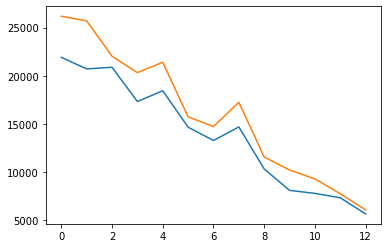

In [26]:
#max-qのある場合と無い場合とでGPUスコアがどのぐらい変わるのか比較
x=maxq.index
y1=maxq['3DMark Fire StrikeGraphics_x']
y2=maxq['3DMark Fire StrikeGraphics_y']
#plt.figure(figsize=('6,6'))
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot

In [27]:
#ベンチマーク表にスコアが乗っていなかったGPUをスコアを手入力
fire_strike=fire_strike.append({'GPU':'QualcommAdreno675','3DMark Fire StrikeGraphics':0},ignore_index=True)
fire_strike=fire_strike.append({'GPU':'QualcommAdreno690','3DMark Fire StrikeGraphics':0},ignore_index=True)
fire_strike=fire_strike.append({'GPU':'QuadroT1000','3DMark Fire StrikeGraphics':8727},ignore_index=True)
fire_strike=fire_strike.append({'GPU':'T1200','3DMark Fire StrikeGraphics':10266},ignore_index=True)
fire_strike=fire_strike.append({'GPU':'QuadroT2000','3DMark Fire StrikeGraphics':9660},ignore_index=True)
fire_strike=fire_strike.append({'GPU':'QuadroT500','3DMark Fire StrikeGraphics':4225},ignore_index=True)
fire_strike=fire_strike.append({'GPU':'QuadroP620','3DMark Fire StrikeGraphics':4673},ignore_index=True)
fire_strike=fire_strike.append({'GPU':'QuadroRTX3000Max-Q','3DMark Fire StrikeGraphics':13617},ignore_index=True)
fire_strike=fire_strike.append({'GPU':'RTXA2000','3DMark Fire StrikeGraphics':13299},ignore_index=True)
fire_strike=fire_strike.append({'GPU':'RTXA3000','3DMark Fire StrikeGraphics':20417},ignore_index=True)
fire_strike=fire_strike.append({'GPU':'QuadroRTX3000','3DMark Fire StrikeGraphics':14842},ignore_index=True)
fire_strike=fire_strike.append({'GPU':'QuadroT1000Max-Q','3DMark Fire StrikeGraphics':7775},ignore_index=True)
fire_strike=fire_strike.append({'GPU':'RTXA4000','3DMark Fire StrikeGraphics':21998},ignore_index=True)
fire_strike=fire_strike.append({'GPU':'RTXA5000','3DMark Fire StrikeGraphics':23579},ignore_index=True)
fire_strike=fire_strike.append({'GPU':'QuadroRTX5000','3DMark Fire StrikeGraphics':23035},ignore_index=True)
fire_strike=fire_strike.append({'GPU':'T600','3DMark Fire StrikeGraphics':6146},ignore_index=True)

In [28]:
#DFとベンチマーク表を照合しベンチマークスコアを入力
def gpuscore(x):
    if len(fire_strike.loc[fire_strike['GPU']==x,'3DMark Fire StrikeGraphics'].tolist())>0:
        return(int(fire_strike.loc[fire_strike['GPU']==x,'3DMark Fire StrikeGraphics'].iloc[0]))

In [29]:
df4['GPU_Score']=df4['GPU'].apply(gpuscore)

In [30]:
df4.loc[df4['GPU_Score'].isnull(),'GPU'].unique()

array([], dtype=object)

In [31]:
df4

,Name,OS,CPU,CPU_Score,Memory,Storage,GPU,Office,Price,GPU_Score
1,KanoKano PC,Windows Pro,インテル Celeron N4000(Gemini Lake)1.1GHz/2コア,1406,4GB,eMMC：64GB,IntelIGPU,0.0,"¥19,800",0
3,サイエルインターナショナルM-WORKS MW-WPC02,Windows Home,インテル Celeron Dual-Core N3350(Apollo Lake)1.1GH...,1146,4GB,64GB,IntelIGPU,0.0,"¥21,979",0
8,GeaneeJTW10-4G32G-KET,Windows Pro,インテル Atom x5-Z8350(Cherry Trail)1.44GHz/4コア,924,4GB,32GB,IntelIGPU,0.0,"¥25,800",0
10,ASUSR417YA R417YA-GA044T,Windows Home,AMD E2-70151.5GHz,NaN,4GB,eMMC：64GB,AMDIGPU,1.0,"¥27,000",0
11,サイエルインターナショナルM-WORKS MW-HDW8000,Windows Home,インテル Celeron Dual-Core N3350(Apollo Lake)1.1GH...,1146,4GB,eMMC：64GB,IntelIGPU,0.0,"¥27,480",0
...,...,...,...,...,...,...,...,...,...,...
4953,ASUSROG Zephyrus Duo 15 GX550LXS GX550LXS-I9R2...,Windows Home,第10世代 インテル Core i9 10980HK(Comet Lake)2.4GHz/8コア,16585,32GB,SSD：2TB,GeForceRTX2080SuperMax-Q,0.0,"¥599,800",21902
4954,ASUSROG Zephyrus Duo 15 SE GX551QS GX551QS-R9X...,Windows Home,第4世代 AMD Ryzen 9 5900HX3.3GHz/8コア,23490,32GB,SSD：2TB,GeForceRTX3080,1.0,"¥599,800",27802
4955,ASUSProArt StudioBook Pro X W730G5T W730G5T-H8...,Windows Pro,インテル Xeon E-2276M(Coffee Lake)2.8GHz/6コア,12069,64GB,SSD：1TB,QuadroRTX5000,0.0,"¥649,000",23035
4956,LenovoThinkPad P15 Gen 2 Windows 10 Pro for Wo...,Windows Pro,インテル Xeon W-11855M(Tiger Lake)3.2GHz/6コア,19121,32GB,M.2 SSD：512GB,RTXA5000,0.0,"¥671,352",23579


In [32]:
#CPUスコアが載ってなかったものを手入力
df5=df4.copy()
df5.loc[df5['CPU']=='第11世代 インテル Core i9 11980HK(Tiger Lake)3.3GHz/8コア','CPU_Score']=24017
df5.loc[df5['CPU']=='第11世代 インテル Core i5 1130G7(Tiger Lake)1.8GHz/4コア','CPU_Score']=10483
df5.dropna(subset=['CPU_Score'],inplace=True)
df5['CPU_Score']=df5['CPU_Score'].astype(int)

In [33]:
df6=df5.copy()
#df['target_enc'] = df.groupby('type')[''].transform('mean')

In [34]:
df6['Price'].unique()

array(['¥19,800', '¥21,979', '¥25,800', ..., '¥649,000', '¥671,352',
       '¥687,225'], dtype=object)

In [35]:
df6['Price']=df6['Price'].apply(lambda x:int(x.replace(',','').replace('¥','')))
df6

,Name,OS,CPU,CPU_Score,Memory,Storage,GPU,Office,Price,GPU_Score
1,KanoKano PC,Windows Pro,インテル Celeron N4000(Gemini Lake)1.1GHz/2コア,1406,4GB,eMMC：64GB,IntelIGPU,0.0,19800,0
3,サイエルインターナショナルM-WORKS MW-WPC02,Windows Home,インテル Celeron Dual-Core N3350(Apollo Lake)1.1GH...,1146,4GB,64GB,IntelIGPU,0.0,21979,0
8,GeaneeJTW10-4G32G-KET,Windows Pro,インテル Atom x5-Z8350(Cherry Trail)1.44GHz/4コア,924,4GB,32GB,IntelIGPU,0.0,25800,0
11,サイエルインターナショナルM-WORKS MW-HDW8000,Windows Home,インテル Celeron Dual-Core N3350(Apollo Lake)1.1GH...,1146,4GB,eMMC：64GB,IntelIGPU,0.0,27480,0
14,ドスパラVF-AD4 Windows 10 Pro/Celeron N4000/14インチ ...,Windows Pro,インテル Celeron N4000(Gemini Lake)1.1GHz/2コア,1406,4GB,eMMC：64GB,IntelIGPU,0.0,27980,0
...,...,...,...,...,...,...,...,...,...,...
4953,ASUSROG Zephyrus Duo 15 GX550LXS GX550LXS-I9R2...,Windows Home,第10世代 インテル Core i9 10980HK(Comet Lake)2.4GHz/8コア,16585,32GB,SSD：2TB,GeForceRTX2080SuperMax-Q,0.0,599800,21902
4954,ASUSROG Zephyrus Duo 15 SE GX551QS GX551QS-R9X...,Windows Home,第4世代 AMD Ryzen 9 5900HX3.3GHz/8コア,23490,32GB,SSD：2TB,GeForceRTX3080,1.0,599800,27802
4955,ASUSProArt StudioBook Pro X W730G5T W730G5T-H8...,Windows Pro,インテル Xeon E-2276M(Coffee Lake)2.8GHz/6コア,12069,64GB,SSD：1TB,QuadroRTX5000,0.0,649000,23035
4956,LenovoThinkPad P15 Gen 2 Windows 10 Pro for Wo...,Windows Pro,インテル Xeon W-11855M(Tiger Lake)3.2GHz/6コア,19121,32GB,M.2 SSD：512GB,RTXA5000,0.0,671352,23579


In [36]:
df6['Memory'].unique()

array(['4GB', '8GB', '12GB', '16GB', '32GB', '64GB'], dtype=object)

In [37]:
#メモリをint化
df6['_Memory']=df6['Memory'].str.replace('GB','')
df6['_Memory']=df6['_Memory'].astype(int)

In [38]:
df6

,Name,OS,CPU,CPU_Score,Memory,Storage,GPU,Office,Price,GPU_Score,_Memory
1,KanoKano PC,Windows Pro,インテル Celeron N4000(Gemini Lake)1.1GHz/2コア,1406,4GB,eMMC：64GB,IntelIGPU,0.0,19800,0,4
3,サイエルインターナショナルM-WORKS MW-WPC02,Windows Home,インテル Celeron Dual-Core N3350(Apollo Lake)1.1GH...,1146,4GB,64GB,IntelIGPU,0.0,21979,0,4
8,GeaneeJTW10-4G32G-KET,Windows Pro,インテル Atom x5-Z8350(Cherry Trail)1.44GHz/4コア,924,4GB,32GB,IntelIGPU,0.0,25800,0,4
11,サイエルインターナショナルM-WORKS MW-HDW8000,Windows Home,インテル Celeron Dual-Core N3350(Apollo Lake)1.1GH...,1146,4GB,eMMC：64GB,IntelIGPU,0.0,27480,0,4
14,ドスパラVF-AD4 Windows 10 Pro/Celeron N4000/14インチ ...,Windows Pro,インテル Celeron N4000(Gemini Lake)1.1GHz/2コア,1406,4GB,eMMC：64GB,IntelIGPU,0.0,27980,0,4
...,...,...,...,...,...,...,...,...,...,...,...
4953,ASUSROG Zephyrus Duo 15 GX550LXS GX550LXS-I9R2...,Windows Home,第10世代 インテル Core i9 10980HK(Comet Lake)2.4GHz/8コア,16585,32GB,SSD：2TB,GeForceRTX2080SuperMax-Q,0.0,599800,21902,32
4954,ASUSROG Zephyrus Duo 15 SE GX551QS GX551QS-R9X...,Windows Home,第4世代 AMD Ryzen 9 5900HX3.3GHz/8コア,23490,32GB,SSD：2TB,GeForceRTX3080,1.0,599800,27802,32
4955,ASUSProArt StudioBook Pro X W730G5T W730G5T-H8...,Windows Pro,インテル Xeon E-2276M(Coffee Lake)2.8GHz/6コア,12069,64GB,SSD：1TB,QuadroRTX5000,0.0,649000,23035,64
4956,LenovoThinkPad P15 Gen 2 Windows 10 Pro for Wo...,Windows Pro,インテル Xeon W-11855M(Tiger Lake)3.2GHz/6コア,19121,32GB,M.2 SSD：512GB,RTXA5000,0.0,671352,23579,32


In [39]:
#ストレージのそれぞれのオプションをワンホットエンコーディング（SDDとHDDのハイブリッド等も見られるため）
df7=df6.copy()
#df7 = df7.reset_index(drop=True)

df7['_Storage_eMMC']=''
df7['_Storage_HDD']=''
df7['_Storage_Optane']=''
df7['_Storage_M.2_SSD']=''
df7['_Storage_SSD']=''

In [40]:
df7['Storage'].unique()

array(['eMMC：64GB', '64GB', '32GB', 'M.2 SSD：64GB', 'SSD：240GB',
       'M.2 SSD：128GB', 'SSD：256GB', 'M.2 SSD：256GB', 'SSD：512GB',
       'M.2 SSD：512GB', 'HDD：500GB', 'M.2 SSD：250GB', 'HDD：1TBSSD：256GB',
       'SSD：128GB', 'SSD：480GB', 'HDD：1TBSSD：512GB', 'M.2 SSD：500GB',
       'HDD：1TB', 'HDD：1TBM.2 SSD：500GB', 'M.2 SSD：1TB', 'eMMC：128GB',
       '512GB SSD + 32GB Optaneメモリ', 'HDD：1TBM.2 SSD：256GB',
       'フラッシュメモリー：64GB', 'SSD：512GB + 32GB Optaneメモリ', 'SSD：1TB',
       'eMMC：256GB', 'M.2 SSD：512GB + 32GB Optaneメモリ', 'HDD：1TBSSD：1TB',
       'HDD：1TBSSD：240GB', 'HDD：1TBM.2 SSD：512GB',
       'SSD：256GB + 16GB Optaneメモリ', 'HDD：1TBSSD：256GB + 16GB Optaneメモリ',
       'フラッシュメモリー：128GB', 'M.2 SSD：256GBeMMC：64GB', 'HDD：1TBM.2 SSD：1TB',
       'M.2 SSD：1TB + 32GB Optaneメモリ', '1TB SSD + 32GB Optaneメモリ',
       'HDD：2TBSSD：1TB', 'HDD：1TBM.2 SSD：250GB',
       'SSD：1TB + 32GB Optaneメモリ', 'SSD：2TB',
       '512GB M.2 SSD + 32GB Optaneメモリ', 'HDD：2TBM.2 SSD：512GB',
       'M.2 SSD：2TB', 'M.2 

In [41]:
#df7.apply(storage,axis=1)
for i,row in df7.iterrows():
    df7.at[i,'_Storage_eMMC']=re.findall('eMMC：(.{2,4}B)',row['Storage'])
    df7.at[i,'_Storage_HDD']=re.findall('HDD：(.{2,4}B)',row['Storage'])
    df7.at[i,'_Storage_Optane']=re.findall('(.{2,4}B) Optaneメモリ',row['Storage'])
    
    if 'M.2' in row['Storage']:
        df7.at[i,'_Storage_M.2_SSD']=re.findall('M.2 SSD：(.{2,4}B)',row['Storage'])
    elif 'SSD' in row['Storage']:
        df7.at[i,'_Storage_SSD']=re.findall('SSD：(.{2,4}B)',row['Storage'])

In [42]:
#df7[df7['Storage'].str.contains('aaa')]

In [43]:
df7['_Storage_HDD']=df7['_Storage_HDD'].apply(lambda x: ','.join(x))
df7['_Storage_eMMC']=df7['_Storage_eMMC'].apply(lambda x: ','.join(x))
df7['_Storage_Optane']=df7['_Storage_Optane'].apply(lambda x: ','.join(x))
df7['_Storage_M.2_SSD']=df7['_Storage_M.2_SSD'].apply(lambda x: ','.join(x))
df7['_Storage_SSD']=df7['_Storage_SSD'].apply(lambda x: ','.join(x))

In [44]:
#df7[df7['Storage'].str.contains('Optane')]

In [45]:
#例外を手入力で変換
df7.loc[df7['Storage']=='64GB','Storage_eMMC']='64GB'
df7.loc[df7['Storage']=='32GB','Storage_eMMC']='32GB'
df7.loc[df7['Storage']=='512GB SSD + 32GB Optaneメモリ','Storage_SSD']='512GB'
df7.loc[df7['Storage']=='1TB SSD + 32GB Optaneメモリ','Storage_SSD']='1TB'
df7.loc[df7['Storage']=='512GB M.2 SSD + 32GB Optaneメモリ','Storage_M.2_SSD']='512GB'
df7.loc[df7['Storage']=='512GB M.2 SSD + 32GB Optaneメモリ','Storage_M.2_SSD']='512GB'
df7.loc[df7['Storage']=='フラッシュメモリー：64GB','Storage_eMMC']='64GB'
df7.loc[df7['Storage']=='フラッシュメモリー：128GB','Storage_eMMC']='128GB'

In [46]:
df7[['_Storage_HDD','_Storage_eMMC','_Storage_Optane','_Storage_M.2_SSD','_Storage_SSD']]=df7[['_Storage_HDD','_Storage_eMMC','_Storage_Optane','_Storage_M.2_SSD','_Storage_SSD']].replace('',0)
df7[['_Storage_HDD','_Storage_eMMC','_Storage_Optane','_Storage_M.2_SSD','_Storage_SSD']]=df7[['_Storage_HDD','_Storage_eMMC','_Storage_Optane','_Storage_M.2_SSD','_Storage_SSD']].fillna(0)

In [47]:
df8=df7.copy()

In [48]:
df8['_Storage_eMMC']=df8['_Storage_eMMC'].replace('GB','',regex=True)
df8['_Storage_HDD']=df8['_Storage_HDD'].replace('GB','',regex=True)
df8['_Storage_Optane']=df8['_Storage_Optane'].replace('GB','',regex=True)
df8['_Storage_M.2_SSD']=df8['_Storage_M.2_SSD'].replace('GB','',regex=True)
df8['_Storage_SSD']=df8['_Storage_SSD'].replace('GB','',regex=True)

In [49]:
'''
df8['Storage_eMMC']=df8['Storage_eMMC'].replace('TB','*1000',regex=True)
df8['Storage_HDD']=df8['Storage_HDD'].replace('TB','',regex=True)
df8['Storage_Optane']=df8['Storage_Optane'].replace('TB','',regex=True)
df8['Storage_M.2_SSD']=df8['Storage_M.2_SSD'].replace('TB','',regex=True)
df8['Storage_SSD']=df8['Storage_SSD'].replace('TB','',regex=True)
'''

"\ndf8['Storage_eMMC']=df8['Storage_eMMC'].replace('TB','*1000',regex=True)\ndf8['Storage_HDD']=df8['Storage_HDD'].replace('TB','',regex=True)\ndf8['Storage_Optane']=df8['Storage_Optane'].replace('TB','',regex=True)\ndf8['Storage_M.2_SSD']=df8['Storage_M.2_SSD'].replace('TB','',regex=True)\ndf8['Storage_SSD']=df8['Storage_SSD'].replace('TB','',regex=True)\n"

In [50]:
df8.tail()

,Name,OS,CPU,CPU_Score,Memory,Storage,GPU,Office,Price,GPU_Score,_Memory,_Storage_eMMC,_Storage_HDD,_Storage_Optane,_Storage_M.2_SSD,_Storage_SSD,Storage_eMMC,Storage_SSD,Storage_M.2_SSD
4953,ASUSROG Zephyrus Duo 15 GX550LXS GX550LXS-I9R2...,Windows Home,第10世代 インテル Core i9 10980HK(Comet Lake)2.4GHz/8コア,16585,32GB,SSD：2TB,GeForceRTX2080SuperMax-Q,0.0,599800,21902,32,0,0,0,0,2TB,NaN,NaN,NaN
4954,ASUSROG Zephyrus Duo 15 SE GX551QS GX551QS-R9X...,Windows Home,第4世代 AMD Ryzen 9 5900HX3.3GHz/8コア,23490,32GB,SSD：2TB,GeForceRTX3080,1.0,599800,27802,32,0,0,0,0,2TB,NaN,NaN,NaN
4955,ASUSProArt StudioBook Pro X W730G5T W730G5T-H8...,Windows Pro,インテル Xeon E-2276M(Coffee Lake)2.8GHz/6コア,12069,64GB,SSD：1TB,QuadroRTX5000,0.0,649000,23035,64,0,0,0,0,1TB,NaN,NaN,NaN
4956,LenovoThinkPad P15 Gen 2 Windows 10 Pro for Wo...,Windows Pro,インテル Xeon W-11855M(Tiger Lake)3.2GHz/6コア,19121,32GB,M.2 SSD：512GB,RTXA5000,0.0,671352,23579,32,0,0,0,512,0,NaN,NaN,NaN
4959,LenovoThinkPad P1 Gen 4 Core i9 11950H・32GBメモリ...,Windows Home,第11世代 インテル Core i9 11950H(Tiger Lake)2.6GHz/8コア,23030,32GB,M.2 SSD：512GB,RTXA5000,0.0,687225,23579,32,0,0,0,512,0,NaN,NaN,NaN


In [51]:
subdf=df8[['_Storage_eMMC','_Storage_HDD','_Storage_Optane','_Storage_M.2_SSD','_Storage_SSD']].copy()
subdf=subdf.reset_index()
subdf.tail(20)

,index,_Storage_eMMC,_Storage_HDD,_Storage_Optane,_Storage_M.2_SSD,_Storage_SSD
2730,4932,0,0,0,512,0
2731,4933,0,0,0,1TB,0
2732,4934,0,0,0,256,0
2733,4935,0,0,0,1TB,0
2734,4938,0,0,0,0,1TB
2735,4939,0,0,0,1.5TB,0
2736,4940,0,0,0,2TB,0
2737,4941,0,0,0,1.5TB,0
2738,4942,0,0,0,512,0
2739,4945,0,0,0,2TB,0


In [52]:
for i,row in subdf.iterrows():
    for j,item in enumerate(row):
        #print(i,j)
        if 'TB' in str(item):
            subdf.iloc[i,j]=int(float(item.replace('TB',''))*1000)
            #print(i,j)

In [53]:
subdf=subdf.astype(int)

In [54]:
subdf.tail(20)

,index,_Storage_eMMC,_Storage_HDD,_Storage_Optane,_Storage_M.2_SSD,_Storage_SSD
2730,4932,0,0,0,512,0
2731,4933,0,0,0,1000,0
2732,4934,0,0,0,256,0
2733,4935,0,0,0,1000,0
2734,4938,0,0,0,0,1000
2735,4939,0,0,0,1500,0
2736,4940,0,0,0,2000,0
2737,4941,0,0,0,1500,0
2738,4942,0,0,0,512,0
2739,4945,0,0,0,2000,0


In [55]:
df8=df8[['Name','OS','CPU','GPU','CPU_Score','GPU_Score','Memory','_Memory','Storage','Office','Price']]
df8=df8.reset_index()

In [56]:
df8=pd.merge(df8,subdf,on='index')

In [57]:
#df7[(df7['Storage_eMMC']=='') & (df7['Storage_HDD']=='')  & (df7['Storage_M.2_SSD']=='') & (df7['Storage_SSD']=='')] 

In [58]:
df8.drop('index',axis=1,inplace=True)

In [59]:
df9=df8.copy()
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
encoded = le.fit_transform(df9['OS'].values)
decoded = le.inverse_transform(encoded)
df9['_OS'] = encoded
decoded

array(['Windows Pro', 'Windows Home', 'Windows Pro', ..., 'Windows Pro',
       'Windows Pro', 'Windows Home'], dtype=object)

In [60]:
df10=df9.copy()
df10['Price']=df10['Price'].astype(int)
df10.dtypes
target_dict = df10[['Office','Price']].groupby(['Office'])['Price'].mean().to_dict()
encoded = df10['Office'].map(lambda x: target_dict[x]).values
df10['_Office'] = encoded

In [61]:
df10=df9.copy()
#officelabel={'Office無し':0, 'WPS Office Standard Edition':1, 'Personal':2, 'Buisiness':3}
#encoded=df10['Office'].map(lambda x: officelabel[x]).values
#df10['_Office']=encoded
df10['_Office']=df10['Office'].astype(int)
df10

,Name,OS,CPU,GPU,CPU_Score,GPU_Score,Memory,_Memory,Storage,Office,Price,_Storage_eMMC,_Storage_HDD,_Storage_Optane,_Storage_M.2_SSD,_Storage_SSD,_OS,_Office
0,KanoKano PC,Windows Pro,インテル Celeron N4000(Gemini Lake)1.1GHz/2コア,IntelIGPU,1406,0,4GB,4,eMMC：64GB,0.0,19800,64,0,0,0,0,1,0
1,サイエルインターナショナルM-WORKS MW-WPC02,Windows Home,インテル Celeron Dual-Core N3350(Apollo Lake)1.1GH...,IntelIGPU,1146,0,4GB,4,64GB,0.0,21979,0,0,0,0,0,0,0
2,GeaneeJTW10-4G32G-KET,Windows Pro,インテル Atom x5-Z8350(Cherry Trail)1.44GHz/4コア,IntelIGPU,924,0,4GB,4,32GB,0.0,25800,0,0,0,0,0,1,0
3,サイエルインターナショナルM-WORKS MW-HDW8000,Windows Home,インテル Celeron Dual-Core N3350(Apollo Lake)1.1GH...,IntelIGPU,1146,0,4GB,4,eMMC：64GB,0.0,27480,64,0,0,0,0,0,0
4,ドスパラVF-AD4 Windows 10 Pro/Celeron N4000/14インチ ...,Windows Pro,インテル Celeron N4000(Gemini Lake)1.1GHz/2コア,IntelIGPU,1406,0,4GB,4,eMMC：64GB,0.0,27980,64,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,ASUSROG Zephyrus Duo 15 GX550LXS GX550LXS-I9R2...,Windows Home,第10世代 インテル Core i9 10980HK(Comet Lake)2.4GHz/8コア,GeForceRTX2080SuperMax-Q,16585,21902,32GB,32,SSD：2TB,0.0,599800,0,0,0,0,2000,0,0
2746,ASUSROG Zephyrus Duo 15 SE GX551QS GX551QS-R9X...,Windows Home,第4世代 AMD Ryzen 9 5900HX3.3GHz/8コア,GeForceRTX3080,23490,27802,32GB,32,SSD：2TB,1.0,599800,0,0,0,0,2000,0,1
2747,ASUSProArt StudioBook Pro X W730G5T W730G5T-H8...,Windows Pro,インテル Xeon E-2276M(Coffee Lake)2.8GHz/6コア,QuadroRTX5000,12069,23035,64GB,64,SSD：1TB,0.0,649000,0,0,0,0,1000,1,0
2748,LenovoThinkPad P15 Gen 2 Windows 10 Pro for Wo...,Windows Pro,インテル Xeon W-11855M(Tiger Lake)3.2GHz/6コア,RTXA5000,19121,23579,32GB,32,M.2 SSD：512GB,0.0,671352,0,0,0,512,0,1,0


In [62]:
'''
df11=df10.copy()
target_dict = df11[['GPU','Price']].groupby(['GPU'])['Price'].mean().to_dict()
encoded = df11['GPU'].map(lambda x: target_dict[x]).values
df11['_GPU'] = encoded
'''

"\ndf11=df10.copy()\ntarget_dict = df11[['GPU','Price']].groupby(['GPU'])['Price'].mean().to_dict()\nencoded = df11['GPU'].map(lambda x: target_dict[x]).values\ndf11['_GPU'] = encoded\n"

In [63]:
df11=df10[['CPU_Score','GPU_Score','_Memory', '_Storage_eMMC', '_Storage_HDD', '_Storage_Optane','_Storage_M.2_SSD', '_Storage_SSD', '_OS', '_Office','Price']]
df11

,CPU_Score,GPU_Score,_Memory,_Storage_eMMC,_Storage_HDD,_Storage_Optane,_Storage_M.2_SSD,_Storage_SSD,_OS,_Office,Price
0,1406,0,4,64,0,0,0,0,1,0,19800
1,1146,0,4,0,0,0,0,0,0,0,21979
2,924,0,4,0,0,0,0,0,1,0,25800
3,1146,0,4,64,0,0,0,0,0,0,27480
4,1406,0,4,64,0,0,0,0,1,0,27980
...,...,...,...,...,...,...,...,...,...,...,...
2745,16585,21902,32,0,0,0,0,2000,0,0,599800
2746,23490,27802,32,0,0,0,0,2000,0,1,599800
2747,12069,23035,64,0,0,0,0,1000,1,0,649000
2748,19121,23579,32,0,0,0,512,0,1,0,671352


In [64]:
#標準化
df12=df11.copy()
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
df12[['CPU_Score','GPU_Score','_Memory', '_Storage_eMMC', '_Storage_HDD', '_Storage_Optane','_Storage_M.2_SSD', '_Storage_SSD','Price']]\
=stdsc.fit_transform(df12[['CPU_Score','GPU_Score','_Memory', '_Storage_eMMC', '_Storage_HDD', '_Storage_Optane','_Storage_M.2_SSD', '_Storage_SSD','Price']])

In [65]:
df12

,CPU_Score,GPU_Score,_Memory,_Storage_eMMC,_Storage_HDD,_Storage_Optane,_Storage_M.2_SSD,_Storage_SSD,_OS,_Office,Price
0,-1.900012,-0.448341,-1.137456,4.166405,-0.302456,-0.139884,-0.673823,-0.800180,1,0,-1.814403
1,-1.953079,-0.448341,-1.137456,-0.115214,-0.302456,-0.139884,-0.673823,-0.800180,0,0,-1.785301
2,-1.998390,-0.448341,-1.137456,-0.115214,-0.302456,-0.139884,-0.673823,-0.800180,1,0,-1.734268
3,-1.953079,-0.448341,-1.137456,4.166405,-0.302456,-0.139884,-0.673823,-0.800180,0,0,-1.711831
4,-1.900012,-0.448341,-1.137456,4.166405,-0.302456,-0.139884,-0.673823,-0.800180,1,0,-1.705153
...,...,...,...,...,...,...,...,...,...,...,...
2745,1.198061,2.490794,2.522863,-0.115214,-0.302456,-0.139884,-0.673823,5.703155,0,0,5.931952
2746,2.607389,3.282544,2.522863,-0.115214,-0.302456,-0.139884,-0.673823,5.703155,0,1,5.931952
2747,0.276333,2.642837,6.706085,-0.115214,-0.302456,-0.139884,-0.673823,2.451487,1,0,6.589056
2748,1.715665,2.715839,2.522863,-0.115214,-0.302456,-0.139884,1.023318,-0.800180,1,0,6.887585


In [66]:
df12.corr()

,CPU_Score,GPU_Score,_Memory,_Storage_eMMC,_Storage_HDD,_Storage_Optane,_Storage_M.2_SSD,_Storage_SSD,_OS,_Office,Price
CPU_Score,1.000000,0.664844,0.478129,-0.197908,-0.042406,0.016121,0.480046,-0.020533,-0.149179,-0.196832,0.471265
GPU_Score,0.664844,1.000000,0.486360,-0.051655,-0.073243,-0.047610,0.564825,-0.118854,-0.109385,-0.266525,0.521207
_Memory,0.478129,0.486360,1.000000,-0.109884,0.076851,0.058785,0.408534,0.183413,0.023322,-0.152535,0.602619
_Storage_eMMC,-0.197908,-0.051655,-0.109884,1.000000,-0.034847,-0.016117,-0.076313,-0.092192,0.138199,0.014598,-0.122219
_Storage_HDD,-0.042406,-0.073243,0.076851,-0.034847,1.000000,-0.032249,-0.136130,0.092536,-0.117293,0.062744,-0.040637
_Storage_Optane,0.016121,-0.047610,0.058785,-0.016117,-0.032249,1.000000,-0.005231,-0.005755,-0.029221,0.012763,0.016955
_Storage_M.2_SSD,0.480046,0.564825,0.408534,-0.076313,-0.136130,-0.005231,1.000000,-0.539179,-0.096221,-0.246688,0.227360
_Storage_SSD,-0.020533,-0.118854,0.183413,-0.092192,0.092536,-0.005755,-0.539179,1.000000,0.002663,0.162213,0.255107
_OS,-0.149179,-0.109385,0.023322,0.138199,-0.117293,-0.029221,-0.096221,0.002663,1.000000,-0.080799,0.248536
_Office,-0.196832,-0.266525,-0.152535,0.014598,0.062744,0.012763,-0.246688,0.162213,-0.080799,1.000000,-0.064153


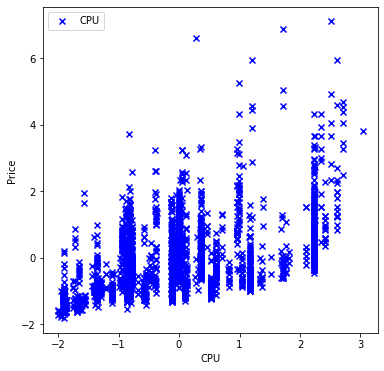

In [67]:
plt.figure(figsize=(6,6))
plt.scatter(df12['CPU_Score'],df12['Price'],marker='x',c='b',label='CPU')
#plt.scatter(df12['_GPU'],df12['Price'],marker='x',c='r',label='GPU')
plt.xlabel('CPU')
plt.ylabel('Price')
plt.legend()
plt.show()

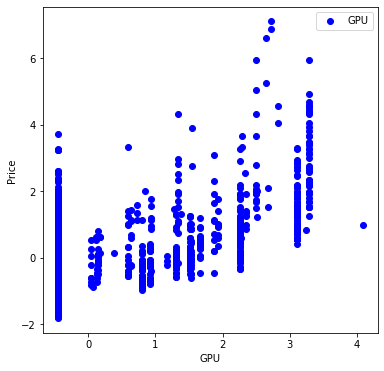

In [68]:
plt.figure(figsize=(6,6))
plt.scatter(df12['GPU_Score'],df12['Price'],marker='o',c='b',label='GPU')
plt.xlabel('GPU')
plt.ylabel('Price')
plt.legend()
plt.show()

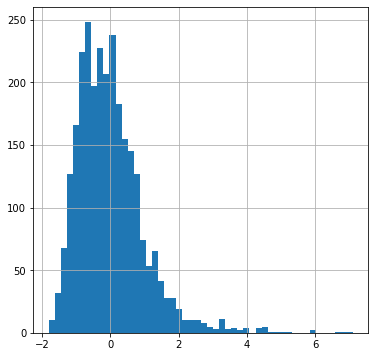

In [69]:
plt.figure(figsize=(6,6))
df12['Price'].hist(bins=50)
plt.show()

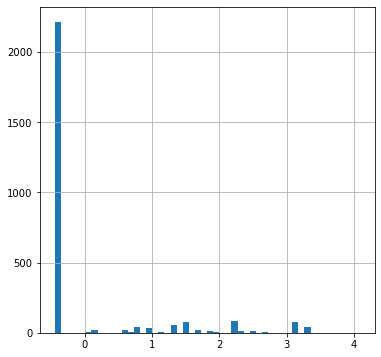

In [70]:
plt.figure(figsize=(6,6))
df12['GPU_Score'].hist(bins=50)
plt.show()

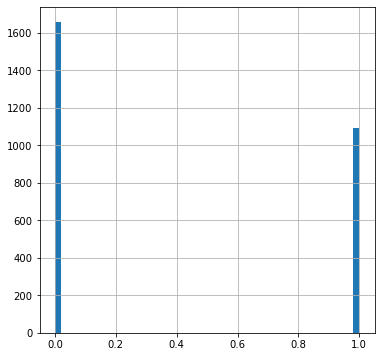

In [71]:
plt.figure(figsize=(6,6))
df12['_Office'].hist(bins=50)
plt.show()

In [72]:
df12.columns

Index(['CPU_Score', 'GPU_Score', '_Memory', '_Storage_eMMC', '_Storage_HDD',
       '_Storage_Optane', '_Storage_M.2_SSD', '_Storage_SSD', '_OS', '_Office',
       'Price'],
      dtype='object')

In [73]:
target=df12['Price'].copy()
explain=df12[['CPU_Score', 'GPU_Score', '_Memory', '_Storage_eMMC', '_Storage_HDD','_Storage_Optane', '_Storage_M.2_SSD', '_Storage_SSD', '_OS', '_Office']].copy()
#explain=df12[['CPU_Score', 'GPU_Score', '_Memory', '_Storage_eMMC', '_Storage_HDD','_Storage_Optane', '_Storage_M.2_SSD', '_Storage_SSD']].copy()

In [74]:
target

0      -1.814403
1      -1.785301
2      -1.734268
3      -1.711831
4      -1.705153
          ...   
2745    5.931952
2746    5.931952
2747    6.589056
2748    6.887585
2749    7.099581
Name: Price, Length: 2750, dtype: float64

In [75]:
import statsmodels.api as sm
model=sm.OLS(target,explain)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.549
Model:                            OLS   Adj. R-squared (uncentered):              0.548
Method:                 Least Squares   F-statistic:                              334.2
Date:                Sat, 27 Nov 2021   Prob (F-statistic):                        0.00
Time:                        21:55:11   Log-Likelihood:                         -2805.7
No. Observations:                2750   AIC:                                      5631.
Df Residuals:                    2740   BIC:                                      5691.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
CPU_Score            0.1239      0.018      6.742      0.000       0.088       0.160
GPU_Score            0.3312      0.019     17.264      0.000       0.294       0.369
_Memory              0.3469      0.018     19.560      0.000       0.312       0.382
_Storage_eMMC       -0.0566      0.013     -4.247      0.000      -0.083      -0.030
_Storage_HDD        -0.0376      0.013     -2.826      0.005      -0.064      -0.012
_Storage_Optane      0.0158      0.013      1.223      0.222      -0.010       0.041
_Storage_M.2_SSD    -0.0393      0.022     -1.788      0.074      -0.082       0.004
_Storage_SSD         0.2132      0.018     11.526      0.000       0.177       0.250
_OS                  0.4821      0.026     18.620      0.000       0.431       0.533
_Office             -0.0411      0.022     -1.881      0.060      -0.084       0.002
==============================================================================
Omnibus:                      736.998   Durbin-Watson:                   0.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2945.655
Skew:                           1.261   Prob(JB):                         0.00
Kurtosis:                       7.398   Cond. No.                         3.82
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
import statsmodels.api as sm
model=sm.WLS(target,explain)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.549
Model:                            WLS   Adj. R-squared (uncentered):              0.548
Method:                 Least Squares   F-statistic:                              334.2
Date:                Sat, 27 Nov 2021   Prob (F-statistic):                        0.00
Time:                        21:55:11   Log-Likelihood:                         -2805.7
No. Observations:                2750   AIC:                                      5631.
Df Residuals:                    2740   BIC:                                      5691.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
CPU_Score            0.1239      0.018      6.742      0.000       0.088       0.160
GPU_Score            0.3312      0.019     17.264      0.000       0.294       0.369
_Memory              0.3469      0.018     19.560      0.000       0.312       0.382
_Storage_eMMC       -0.0566      0.013     -4.247      0.000      -0.083      -0.030
_Storage_HDD        -0.0376      0.013     -2.826      0.005      -0.064      -0.012
_Storage_Optane      0.0158      0.013      1.223      0.222      -0.010       0.041
_Storage_M.2_SSD    -0.0393      0.022     -1.788      0.074      -0.082       0.004
_Storage_SSD         0.2132      0.018     11.526      0.000       0.177       0.250
_OS                  0.4821      0.026     18.620      0.000       0.431       0.533
_Office             -0.0411      0.022     -1.881      0.060      -0.084       0.002
==============================================================================
Omnibus:                      736.998   Durbin-Watson:                   0.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2945.655
Skew:                           1.261   Prob(JB):                         0.00
Kurtosis:                       7.398   Cond. No.                         3.82
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
import statsmodels.api as sm
model=sm.GLS(target,explain)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 GLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.549
Model:                            GLS   Adj. R-squared (uncentered):              0.548
Method:                 Least Squares   F-statistic:                              334.2
Date:                Sat, 27 Nov 2021   Prob (F-statistic):                        0.00
Time:                        21:55:11   Log-Likelihood:                         -2805.7
No. Observations:                2750   AIC:                                      5631.
Df Residuals:                    2740   BIC:                                      5691.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
CPU_Score            0.1239      0.018      6.742      0.000       0.088       0.160
GPU_Score            0.3312      0.019     17.264      0.000       0.294       0.369
_Memory              0.3469      0.018     19.560      0.000       0.312       0.382
_Storage_eMMC       -0.0566      0.013     -4.247      0.000      -0.083      -0.030
_Storage_HDD        -0.0376      0.013     -2.826      0.005      -0.064      -0.012
_Storage_Optane      0.0158      0.013      1.223      0.222      -0.010       0.041
_Storage_M.2_SSD    -0.0393      0.022     -1.788      0.074      -0.082       0.004
_Storage_SSD         0.2132      0.018     11.526      0.000       0.177       0.250
_OS                  0.4821      0.026     18.620      0.000       0.431       0.533
_Office             -0.0411      0.022     -1.881      0.060      -0.084       0.002
==============================================================================
Omnibus:                      736.998   Durbin-Watson:                   0.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2945.655
Skew:                           1.261   Prob(JB):                         0.00
Kurtosis:                       7.398   Cond. No.                         3.82
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
import statsmodels.api as sm
model=sm.RecursiveLS(target,explain)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2750
Model:                    RecursiveLS   Log Likelihood               -2848.251
Date:                Sat, 27 Nov 2021   R-squared:                       0.550
Time:                        21:55:11   AIC                           5716.502
Sample:                             0   BIC                           5775.696
                               - 2750   HQIC                          5737.888
Covariance Type:            nonrobust   Scale                            0.472
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
CPU_Score            0.1239      0.019      6.597      0.000       0.087       0.161
GPU_Score            0.3312      0.020     16.893      0.000       0.293       0.370
_Memory              0.3469      0.018     19.140      0.000       0.311       0.382
_Storage_eMMC       -0.0566      0.014     -4.156      0.000      -0.083      -0.030
_Storage_HDD        -0.0376      0.014     -2.765      0.006      -0.064      -0.011
_Storage_Optane      0.0158      0.013      1.196      0.232      -0.010       0.042
_Storage_M.2_SSD    -0.0393      0.022     -1.750      0.080      -0.083       0.005
_Storage_SSD         0.2132      0.019     11.278      0.000       0.176       0.250
_OS                  0.4821      0.026     18.219      0.000       0.430       0.534
_Office             -0.0411      0.022     -1.840      0.066      -0.085       0.003
===================================================================================
Ljung-Box (L1) (Q):                 739.62   Jarque-Bera (JB):              3801.94
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.00   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.83
===================================================================================

Warnings:
[1] Parameters and covariance matrix estimates are RLS estimates conditional on the entire sample.
"""

In [79]:
import xgboost as xgb

In [80]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error



In [81]:
test=0.3
seed=42

from sklearn.model_selection import train_test_split
exp_train,exp_test,tar_train,tar_test=train_test_split(explain,target,test_size=test,random_state=seed)

from sklearn import linear_model
reg= linear_model.LinearRegression()
reg.fit(exp_train,tar_train)
reg.score(exp_test,tar_test)

0.5885133391380062

In [82]:
coef=pd.Series(reg.coef_,index=exp_train.columns)

In [83]:
coef

CPU_Score           0.145963
GPU_Score           0.336632
_Memory             0.343319
_Storage_eMMC      -0.071540
_Storage_HDD       -0.024484
_Storage_Optane     0.015576
_Storage_M.2_SSD   -0.020910
_Storage_SSD        0.214228
_OS                 0.712338
_Office             0.208097
dtype: float64

In [84]:
import xgboost as xgb
test=0.3
seed=42

from sklearn.model_selection import train_test_split
exp_train,exp_test,tar_train,tar_test=train_test_split(explain,target,test_size=test,random_state=seed)
xgbregressor=xgb.XGBRegressor()
xgbregressor.fit(exp_train,tar_train)
xgbregressor.score(exp_test,tar_test)

0.7933752600460371

In [85]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(xgbregressor,exp_train,tar_train,cv=10)
scores.mean()

0.7203960753983052

In [86]:
reg_cv = GridSearchCV(xgbregressor, {'max_depth': [2,4,6], 'n_estimators': [1,5,10,50,100,500,1000]}, verbose=1)
reg_cv.fit(exp_train, tar_train)
print (reg_cv.best_params_, reg_cv.best_score_)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:   10.9s finished


{'max_depth': 2, 'n_estimators': 1000} 0.7229304646586591


In [87]:
from pycaret.regression import *


In [88]:
exp=setup(df12, target='Price')

,Description,Value
0,session_id,5242
1,Target,Price
2,Original Data,"(2750, 11)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1924, 10)"


In [89]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.3420,0.2603,0.5089,0.7311,0.2343,1.5593,0.1120
lightgbm,Light Gradient Boosting Machine,0.3602,0.2851,0.5309,0.7097,0.2396,1.5635,0.0750
rf,Random Forest Regressor,0.3540,0.2871,0.5341,0.7041,0.2371,1.5601,0.0400
gbr,Gradient Boosting Regressor,0.3854,0.2928,0.5386,0.7014,0.2513,1.6662,0.0130
et,Extra Trees Regressor,0.3621,0.2947,0.5412,0.6927,0.2417,1.7039,0.0340
knn,K Neighbors Regressor,0.4039,0.3703,0.6025,0.6311,0.2681,1.7330,0.0060
dt,Decision Tree Regressor,0.3888,0.3716,0.6070,0.6198,0.2582,1.8671,0.0050
br,Bayesian Ridge,0.4715,0.4121,0.6399,0.5807,0.3015,2.2754,0.0040
lar,Least Angle Regression,0.4714,0.4122,0.6399,0.5806,0.3017,2.2838,0.0040
ridge,Ridge Regression,0.4714,0.4122,0.6399,0.5806,0.3017,2.2820,0.0050


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=5242, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
             validate_parameters=1, verbosity=0)

In [90]:
model=create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3695,0.2701,0.5197,0.7916,0.2409,1.6550
1,0.2984,0.1987,0.4457,0.6552,0.2193,2.0258
2,0.3145,0.2357,0.4854,0.7910,0.2065,0.8275
3,0.3262,0.2186,0.4676,0.7241,0.2419,2.8473
4,0.3691,0.2917,0.5401,0.6595,0.2457,0.8635
5,0.3437,0.2658,0.5156,0.8040,0.2375,1.3890
6,0.3558,0.2795,0.5287,0.6981,0.2440,1.2203
7,0.3829,0.3131,0.5596,0.7011,0.2571,2.1186
8,0.3239,0.2233,0.4725,0.7800,0.2341,1.3494
9,0.3365,0.3067,0.5538,0.7069,0.2165,1.2970


In [91]:
print(model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=5242, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
             validate_parameters=1, verbosity=0)


In [92]:
tuned_model=tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3800,0.3049,0.5521,0.7648,0.2390,1.6180
1,0.3061,0.2062,0.4541,0.6422,0.2173,2.0592
2,0.3164,0.2499,0.4999,0.7783,0.2108,0.7780
3,0.3361,0.2144,0.4630,0.7295,0.2387,2.8519
4,0.3692,0.2886,0.5372,0.6631,0.2466,0.8758
5,0.3352,0.2509,0.5009,0.8150,0.2311,1.3800
6,0.3731,0.3203,0.5660,0.6541,0.2562,1.2002
7,0.3845,0.3007,0.5483,0.7130,0.2547,1.8089
8,0.3096,0.2026,0.4501,0.8004,0.2260,1.3205
9,0.3277,0.2912,0.5396,0.7217,0.2155,1.3056


In [93]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.3156,0.2281,0.4776,0.7677,0.2283,1.8227


,CPU_Score,GPU_Score,_Memory,_Storage_eMMC,_Storage_HDD,_Storage_Optane,_Storage_M.2_SSD,_Storage_SSD,_OS,_Office,Price,Label
0,-0.119013,-0.448341,-0.614553,-0.115214,-0.302456,-0.139884,-0.673823,0.032247,0,0,-0.697860,-0.476345
1,1.049066,-0.448341,-0.614553,-0.115214,-0.302456,-0.139884,0.174748,-0.800180,0,0,-0.818329,-0.685880
2,-0.119013,-0.448341,-0.614553,-0.115214,-0.302456,-0.139884,-0.673823,0.864674,1,1,0.239449,0.392621
3,-0.132280,-0.448341,0.431252,-0.115214,-0.302456,-0.139884,-0.673823,0.864674,1,1,1.390985,1.599082
4,1.173976,-0.448341,0.431252,-0.115214,-0.302456,-0.139884,1.023318,-0.800180,0,1,-0.483366,-0.518522
...,...,...,...,...,...,...,...,...,...,...,...,...
821,-1.648966,-0.448341,-0.614553,17.011265,-0.302456,-0.139884,-0.673823,-0.800180,1,0,-0.509810,-0.311034
822,-0.008186,0.138225,0.431252,-0.115214,-0.302456,-0.139884,1.023318,-0.800180,0,0,0.250321,-0.258597
823,-0.008186,-0.448341,0.431252,-0.115214,-0.302456,-0.139884,-0.673823,2.451487,0,0,0.812413,0.654034
824,-1.900012,-0.448341,-1.137456,-0.115214,-0.302456,-0.139884,-0.673823,-0.800180,1,0,-1.616070,-1.629050


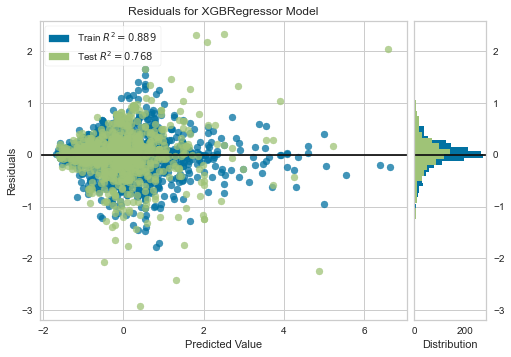

In [94]:
plot_model(tuned_model)

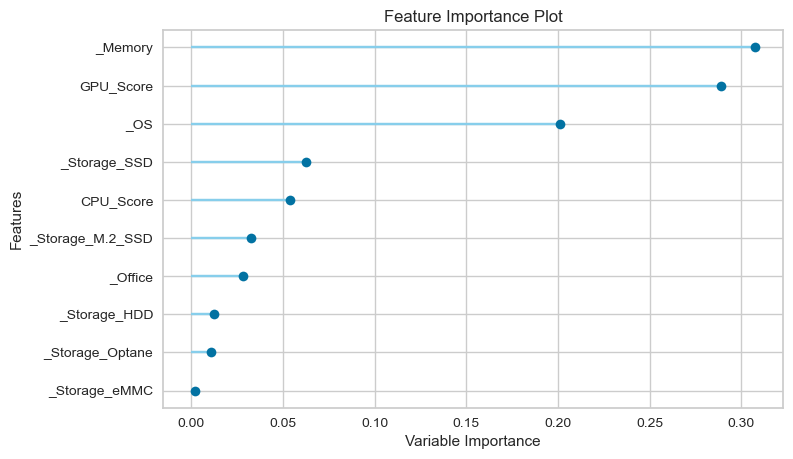

In [95]:
plot_model(tuned_model, plot='feature')